In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("car data.csv")

In [59]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [60]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

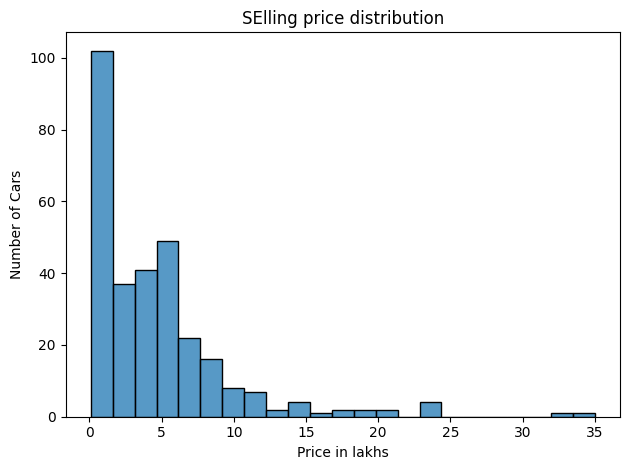

In [61]:

sns.histplot(df["Selling_Price"],edgecolor="black")
plt.title("SElling price distribution")
plt.xlabel("Price in lakhs")
plt.ylabel("Number of Cars")
plt.tight_layout()
plt.savefig("Selling price distribution")

plt.show()

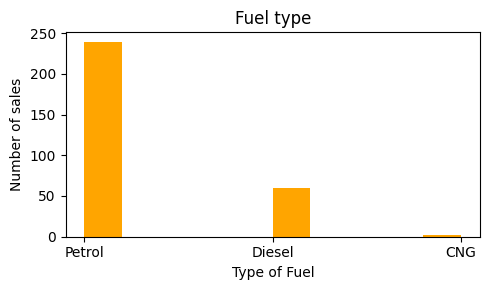

In [62]:
plt.figure(figsize=(5,3))
plt.hist(df["Fuel_Type"],color="orange")
plt.title("Fuel type")
plt.xlabel("Type of Fuel")
plt.ylabel("Number of sales")
plt.tight_layout()
plt.savefig("Fuel type sale")

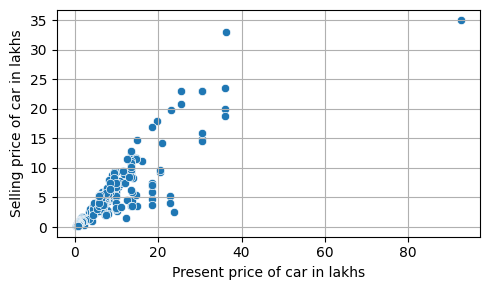

In [74]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="Present_Price",y="Selling_Price",data=df)
plt.grid()
plt.xlabel("Present price of car in lakhs")
plt.ylabel("Selling price of car in lakhs")
plt.tight_layout()
plt.savefig("selling price VS current price")
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [66]:
df = pd.get_dummies(df, drop_first=True)


In [67]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,4.75,9.54,43000,0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,2.85,4.15,5200,0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,4.60,6.87,42450,0,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
297,2015,4.00,5.90,60000,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
298,2009,3.35,11.00,87934,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
299,2017,11.50,12.50,9000,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [68]:
#input data 
x=df[["Year","Present_Price","Kms_Driven",
      "Fuel_Type_Diesel","Fuel_Type_Petrol","Seller_Type_Individual","Transmission_Manual","Owner"]]
y=df["Selling_Price"]

In [69]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [70]:
#Model train
model=LinearRegression()
model.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
model.score(x_test,y_test)*100

80.15660846644546

In [72]:
model.predict([[2018, 5.59, 35000, 0, 1, 0, 1, 1]])


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.06285389])

In [73]:
import pickle
#save model
pickle.dump(model,open("model.pkl",'wb'))
print("Model saved as Model.pkl")


Model saved as Model.pkl
